# Part 1
by: Rafael Carlo Posadas

In [1]:
import numpy as np
import pandas as pd

In [4]:
df0 = pd.read_csv('../KSI_dataset.csv')

## Data exploration

In [81]:
print(f"Shape: {df0.shape}")

Shape: (18957, 54)


In [82]:
# Show all columns
print(f"Columns: \n{df0.columns.tolist()}")

Columns: 
['OBJECTID', 'INDEX', 'ACCNUM', 'DATE', 'TIME', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE', 'LONGITUDE', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'x', 'y']


In [83]:
# Data types of each column.
print("Data types:\n")
df0.info()

Data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           18957 non-null  int64  
 1   INDEX              18957 non-null  int64  
 2   ACCNUM             14027 non-null  float64
 3   DATE               18957 non-null  object 
 4   TIME               18957 non-null  int64  
 5   STREET1            18957 non-null  object 
 6   STREET2            17251 non-null  object 
 7   OFFSET             3820 non-null   object 
 8   ROAD_CLASS         18471 non-null  object 
 9   DISTRICT           18728 non-null  object 
 10  LATITUDE           18957 non-null  float64
 11  LONGITUDE          18957 non-null  float64
 12  ACCLOC             13501 non-null  object 
 13  TRAFFCTL           18882 non-null  object 
 14  VISIBILITY         18933 non-null  object 
 15  LIGHT              18953 non-null  object 
 16  RDSFCOND 

In [84]:
print(df0.isnull().sum()[df0.isnull().sum() > 0])

ACCNUM            4930
STREET2           1706
OFFSET           15137
ROAD_CLASS         486
DISTRICT           229
ACCLOC            5456
TRAFFCTL            75
VISIBILITY          24
LIGHT                4
RDSFCOND            29
ACCLASS              1
IMPACTYPE           27
INVTYPE             16
INJURY            8897
FATAL_NO         18087
INITDIR           5277
VEHTYPE           3487
MANOEUVER         7953
DRIVACT           9289
DRIVCOND          9291
PEDTYPE          15728
PEDACT           15730
PEDCOND          15711
CYCLISTYPE       18152
CYCACT           18155
CYCCOND          18157
PEDESTRIAN       11269
CYCLIST          16971
AUTOMOBILE        1727
MOTORCYCLE       17273
TRUCK            17788
TRSN_CITY_VEH    17809
EMERG_VEH        18908
PASSENGER        11774
SPEEDING         16263
AG_DRIV           9121
REDLIGHT         17380
ALCOHOL          18149
DISABILITY       18464
dtype: int64


## Data pre-processing

#### Duplicate original dataset and impute binary columns with 'No'.

In [85]:
df1 = df0.copy()
for col in df1.columns:
    if df1[col].isin(["Yes", None]).any():
        df1[col] = df1[col].fillna("No")

In [86]:
# Probably not significant to examine, so this cell is not included in the .py file.
# Identify only columns with missing values.
df0_null_count = df0.isnull().sum()

# Calculate the difference in null counts for 'Yes'/'No' columns.
df1_null_count = df1.isnull().sum()
null_count_difference = df0_null_count - df1_null_count

# Identify and print columns where missing values were replaced with "No".
columns_with_changes = null_count_difference[null_count_difference > 0].index
print(f"Columns with missing values replaced by 'No':\n{columns_with_changes.tolist()}")

Columns with missing values replaced by 'No':
['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']


#### Breakdown DATE column into smaller components

In [87]:
# Convert the DATE column to datetime. This will be dropped later.
df1['DATE'] = pd.to_datetime(df1['DATE'])
# Extract day, month, and year into their own columns.
df1['DAY_OF_WEEK'] = df1['DATE'].dt.day_name()
df1['DAY'] = df1['DATE'].dt.day
df1['MONTH'] = df1['DATE'].dt.month
df1['YEAR'] = df1['DATE'].dt.year
# Extract the hour component. This is not instructed, just personal preference for plot usage.
df1['HOUR'] = (df1['TIME'] // 100).astype(int)

#### Remove insignificant columns (>80% missing values)

In [88]:
# Identify columns with over 80% missing values.
missing_percentage = df1.isnull().sum() / len(df1) * 100
print(f"Missing values percentages: \n{missing_percentage[missing_percentage > 0]}\n")
columns_to_drop = missing_percentage[missing_percentage >= 80].index.tolist()
print(f"Columns with >80% missing values:\n{columns_to_drop}\n")

# - Drop columns with over 80% missing values.
# - The added columns are instructed as redundant and to be dropped.
# - 'WARDNUM' and 'POLICE_DIVISION' were not found in the table, so they're excluded.
# - 'OFFSET' has 79.8% is missing; close enough to 80% so it's also being dropped.
columns_to_drop.extend([
    'OBJECTID',
    'INDEX',
    'NEIGHBOURHOOD_158',
    'NEIGHBOURHOOD_140',
    'x',
    'y',
    'INITDIR',
    'STREET1',
    'STREET2',
    'DIVISION',
    # Manual addition:
    'DATE',
    'OFFSET'
    ])
df1 = df1.drop(columns=columns_to_drop)

# Verify the shape of the updated dataset.
print(f"Shape after dropping columns: {df1.shape}")

Missing values percentages: 
ACCNUM        26.006225
STREET2        8.999314
OFFSET        79.849132
ROAD_CLASS     2.563697
DISTRICT       1.207997
ACCLOC        28.780925
TRAFFCTL       0.395632
VISIBILITY     0.126602
LIGHT          0.021100
RDSFCOND       0.152978
ACCLASS        0.005275
IMPACTYPE      0.142428
INVTYPE        0.084402
INJURY        46.932532
FATAL_NO      95.410666
INITDIR       27.836683
VEHTYPE       18.394261
MANOEUVER     41.952841
DRIVACT       49.000369
DRIVCOND      49.010919
PEDTYPE       82.966714
PEDACT        82.977264
PEDCOND       82.877038
CYCLISTYPE    95.753548
CYCACT        95.769373
CYCCOND       95.779923
dtype: float64

Columns with >80% missing values:
['FATAL_NO', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND']

Shape after dropping columns: (18957, 40)


#### 'ACCLASS' will be the target column as this classifies the accident type - according to the PSDP_Open_Data_Documentation - and also due to its values being only 'Fatal' or 'Non-Fatal'.

In [89]:
# Identify all values in ACCLASS column for correction.
print("'ACCLASS' before correction:")
print(f"unique: {df1['ACCLASS'].unique().tolist()}")
print(f"nulls : {df1['ACCLASS'].isnull().sum()}\n")

# Change incorrect values to "Non-Fatal".
# Only 'Property Damage' was instructed to be corrected, but any other value that's not 'Fatal' will be converted to 'Non-Fatal'.
df1['ACCLASS'] = df1['ACCLASS'].apply(lambda x: 'Non-Fatal' if x != 'Fatal' else x)

# Verify updated ACCLASS values.
print("'ACCLASS' after correction:")
print(f"unique: {df1['ACCLASS'].unique().tolist()}")
print(f"nulls : {df1['ACCLASS'].isnull().sum()}")

'ACCLASS' before correction:
unique: ['Non-Fatal Injury', 'Fatal', 'Property Damage O', nan]
nulls : 1

'ACCLASS' after correction:
unique: ['Non-Fatal', 'Fatal']
nulls : 0


#### Remove insignificant rows

In [90]:
# Identify columns with missing values greater than 0% but less than 3%.
missing_percentage = df1.isnull().sum() / len(df1) * 100
columns_to_keep = missing_percentage[(missing_percentage > 0) & (missing_percentage < 3)].index
print(f"Columns with missing values >0% and <3%:\n{columns_to_keep.tolist()}\n")

# Drop rows with missing values in those columns.
df1 = df1.dropna(subset=columns_to_keep)

# Verify the shape of the updated dataset after dropping rows.
print(f"Shape after dropping rows: {df1.shape}")

Columns with missing values >0% and <3%:
['ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE']

Shape after dropping rows: (18242, 40)


#### Fix ACCNUM column
- Remove rows with duplicate ACCNUM values from df1.
- Hash the entire dataset, find matching hashes, and remove duplicate rows from df1.

In [91]:
# df1 is duplicated.
# Rows with duplicate values in ACCNUM are removed from df1_accnum_fixed. Nulls are kept for deeper cleaning.
# Hash the rest of the dataset.
# Check for duplicate hashes and drop them.
df2 = df1.copy()
df2 = df2[~df2['ACCNUM'].duplicated(keep='first') | df2['ACCNUM'].isna()]
df2['hash'] = df2.drop(columns=['ACCNUM']).apply(lambda row: hash(tuple(row)), axis=1)
df2 = df2.drop_duplicates(subset='hash', keep='first')

# ACCNUM has effectively become a unique ID column, so it's no longer
# useful and will be dropped with the temporary 'hash' column.
df2 = df2.drop(columns=['hash', 'ACCNUM'])

# Verify the shape of the updated dataset after altering ACCNUM.
print(f"Shape after altering ACCNUM: {df2.shape}")

Shape after altering ACCNUM: (9474, 39)


## Statistics
I decided to do stats after pre-processing so that I can account for the added columns and corrected rows.


In [92]:
# Describe the numerical & object type columns.
print(df2.describe())
print(f"\nObject descriptions: \n{df1.describe(include=['object'])}\n")

              TIME     LATITUDE    LONGITUDE          DAY        MONTH  \
count  9474.000000  9474.000000  9474.000000  9474.000000  9474.000000   
mean   1369.970234    43.711529   -79.395054    15.724615     6.897720   
std     627.678535     0.056415     0.104514     8.852084     3.264346   
min       0.000000    43.589678   -79.638390     1.000000     1.000000   
25%     925.000000    43.662398   -79.469875     8.000000     4.000000   
50%    1500.000000    43.704752   -79.396508    16.000000     7.000000   
75%    1854.000000    43.758047   -79.316283    23.000000    10.000000   
max    2359.000000    43.855445   -79.122974    31.000000    12.000000   

              YEAR         HOUR  
count  9474.000000  9474.000000  
mean   2014.677327    13.423158  
std       4.531842     6.284760  
min    2006.000000     0.000000  
25%    2011.000000     9.000000  
50%    2016.000000    15.000000  
75%    2018.000000    18.000000  
max    2023.000000    23.000000  

Object descriptions: 
    

In [93]:
# Get ranges for numeric columns.
print(f"Numerical ranges:")
for col in df2.columns:
    if df2[col].dtype not in ['object']:
        print(f"{col}: {df2[col].min()} to {df2[col].max()}")

Numerical ranges:
TIME: 0 to 2359
LATITUDE: 43.589678 to 43.855445
LONGITUDE: -79.63839 to -79.122974
DAY: 1 to 31
MONTH: 1 to 12
YEAR: 2006 to 2023
HOUR: 0 to 23


In [94]:
# Calculate mean, median, and mode.
print(f"\nMean: \n{df2.mean(numeric_only=True)}\n")
print(f"Median: \n{df2.median(numeric_only=True)}\n")
print(f"Mode: \n{df2.mode().iloc[0]}")


Mean: 
TIME         1369.970234
LATITUDE       43.711529
LONGITUDE     -79.395054
DAY            15.724615
MONTH           6.897720
YEAR         2014.677327
HOUR           13.423158
dtype: float64

Median: 
TIME         1500.000000
LATITUDE       43.704752
LONGITUDE     -79.396508
DAY            16.000000
MONTH           7.000000
YEAR         2016.000000
HOUR           15.000000
dtype: float64

Mode: 
TIME                                1700.0
ROAD_CLASS                  Major Arterial
DISTRICT             Toronto and East York
LATITUDE                         43.645556
LONGITUDE                       -79.385814
ACCLOC                     At Intersection
TRAFFCTL                        No Control
VISIBILITY                           Clear
LIGHT                             Daylight
RDSFCOND                               Dry
ACCLASS                          Non-Fatal
IMPACTYPE            Pedestrian Collisions
INVTYPE                             Driver
INVAGE                             

## Plots

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

### Macro methods

In [96]:
def stacked_hist(df, column, title, xlabel, ylabel, figsize=(12, 4)):
    """
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column to plot against ACCLASS.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    colors (list): Colors for the stacked bars.
    legend_labels (list): Labels for the legend.
    """
    if column == 'DAY_OF_WEEK':  # If the column is 'DAY_OF_WEEK', reorder the days of the week.
        days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
        df[column] = pd.Categorical(df[column], categories=days_order, ordered=True)
        df = df.sort_values(column)

    crosstab = pd.crosstab(df[column], df['ACCLASS'])
    ax = crosstab.plot(kind='bar', stacked=True, figsize=figsize)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{int(height)}',
                    (x + width / 2, y + height),
                    ha='center', va='bottom',
                    fontsize=10, color='black', fontweight='bold')

    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.legend(title='Accident Type', labels=['Fatal', 'Non-Fatal'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.tight_layout()
    plt.show()

In [97]:
def hbar(df, column, title, xlabel, ylabel, figsize=(12, 8)):
    """
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column to plot value counts for.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    figsize (tuple): The size of the figure (width, height).
    """
    value_counts = df[column].value_counts()
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=value_counts.values, y=value_counts.index)
    for i, value in enumerate(value_counts.values):
        ax.text(value + 5, i, str(value), va='center', fontweight='bold')

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.tight_layout()
    plt.show()

In [98]:
def plot_age_distribution(df=df1, age_column='INVAGE', hue_column='ACCLASS', figsize=(18, 5)):
    def extract_numeric(age_label):
        if age_label == 'unknown':
            return -1  # Place 'unknown' first.
        elif age_label == 'Over 95':
            return 95  # Place 'Over 95' last.
        else:
            return int(age_label.split(" ")[0])

    sorted_labels = sorted(df[age_column].unique(), key=extract_numeric)
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x=age_column, order=sorted_labels, hue=hue_column)
    for p in ax.patches:
        height = p.get_height()
        if height != 0:  # Added this to remove the random '0' in the first bar.
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

    plt.title("Distribution of ages involved in accidents (INVAGE)", fontsize=16)
    plt.xlabel("Age Group", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.show()

In [99]:
def map_accidents(df, grid_resolution=100, density_threshold=0.5, dot_size=5, figsize=(18, 13)):
    """
    Generates two plots:
    1. A scatter plot of accidents with a density-driven circle.
    2. A heatmap of accident density.

    df (pd.DataFrame): The dataframe containing accident data.
    accident_col (str): The column name for accident type (e.g., 'ACCLASS').
    lon_col (str): The column name for longitude (e.g., 'LONGITUDE').
    lat_col (str): The column name for latitude (e.g., 'LATITUDE').
    grid_resolution (int): Resolution for the heatmap grid (higher = smoother).
    density_threshold (float): Density threshold for the circle (e.g., 0.5 for 50%).
    """
    accident_col='ACCLASS'
    lon_col='LONGITUDE'
    lat_col='LATITUDE'
    markerscale = 5
    grid_line_alpha = 0.5
    plot_alpha = 0.5
    title_fontsize = 16
    axis_fontsize = 14
    legend_fontsize = 12

    # Plot 1: Scatter plot of all accidents with high-density circle
    plt.figure(figsize=figsize)
    non_fatal = df[df[accident_col] == 'Non-Fatal']
    fatal = df[df[accident_col] == 'Fatal']

    plt.scatter(non_fatal[lon_col], non_fatal[lat_col], alpha=plot_alpha, color='blue', s=dot_size, label='Non-Fatal')
    plt.scatter(fatal[lon_col], fatal[lat_col], alpha=0.5, color='red', s=dot_size, label='Fatal')

    coordinates = np.vstack([df[lon_col], df[lat_col]])
    kde = gaussian_kde(coordinates)
    density = kde(coordinates)
    max_density_idx = np.argmax(density)
    max_density_longitude = df[lon_col].iloc[max_density_idx]
    max_density_latitude = df[lat_col].iloc[max_density_idx]
    threshold_density = np.max(density) * density_threshold
    distances = np.sqrt((df[lon_col] - max_density_longitude)**2 + (df[lat_col] - max_density_latitude)**2)
    radius = np.min(distances[density < threshold_density])

    circle = plt.Circle((max_density_longitude, max_density_latitude), radius=radius, color='yellow', fill=False, linestyle='-', linewidth=2, label=f'Top {density_threshold*100:.0f}% Density')
    plt.gca().add_patch(circle)
    print(f"Hotspot center: ({max_density_longitude}, {max_density_latitude} )")

    plt.title('Location of Accidents', fontsize=title_fontsize)
    plt.xlabel(lon_col, fontsize=axis_fontsize)
    plt.ylabel(lat_col, fontsize=axis_fontsize)
    plt.grid(True, linestyle='--', alpha=grid_line_alpha, color='black')
    plt.legend(title='Legend',
               fontsize=legend_fontsize,
               markerscale=markerscale,
               facecolor='white',
               loc='lower right',
               )
    plt.tight_layout()
    plt.show()

    # Plot 2: Accident density heatmap.
    plt.figure(figsize=figsize)
    grid_x, grid_y = np.mgrid[
        df[lon_col].min():df[lon_col].max():grid_resolution * 1j,
        df[lat_col].min():df[lat_col].max():grid_resolution * 1j
    ]
    grid_coords = np.vstack([grid_x.ravel(), grid_y.ravel()])
    grid_z = kde(grid_coords).reshape(grid_x.shape)

    plt.pcolormesh(grid_x, grid_y, grid_z, shading='auto', cmap='magma')
    plt.scatter(df[lon_col], df[lat_col], color='white', alpha=plot_alpha, s=dot_size/2, label='Accidents')
    plt.title('Accident Density Heatmap', fontsize=title_fontsize)
    plt.xlabel(lon_col, fontsize=axis_fontsize)
    plt.ylabel(lat_col, fontsize=axis_fontsize)
    plt.grid(True, linestyle='--', alpha=grid_line_alpha, color='white')
    plt.legend(title='Legend',
               framealpha=1,
               fontsize=legend_fontsize,
               markerscale=markerscale,
               facecolor='grey',
               loc='lower right',
               )
    plt.tight_layout()
    plt.show()

### Plots 1, 2: Distribution of accident types and severity.

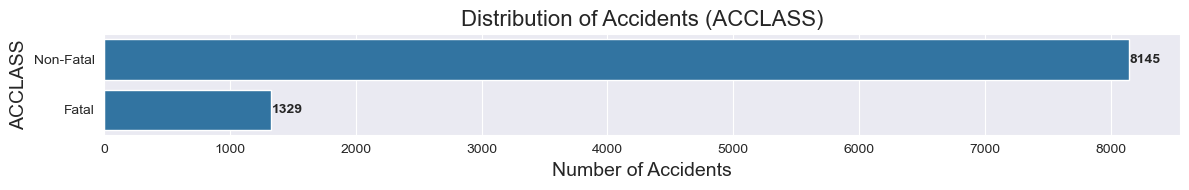

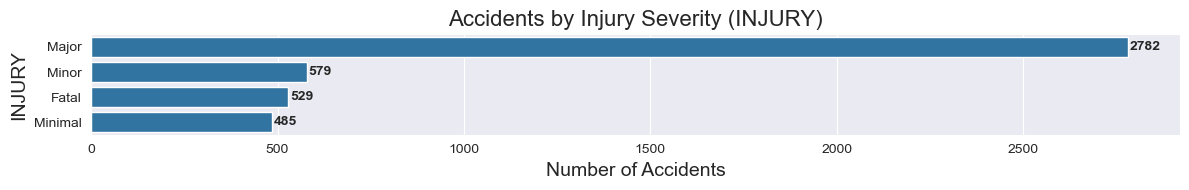

In [100]:
# hbar(df1, 'ACCLASS', 'Distribution of Accidents (ACCLASS)', 'Number of Accidents', 'ACCLASS', figsize=(12, 2))
# hbar(df1, 'INJURY', 'Accidents by Injury Severity (INJURY)', 'Number of Accidents', 'INJURY', figsize=(12, 2))
hbar(df2, 'ACCLASS', 'Distribution of Accidents (ACCLASS)', 'Number of Accidents', 'ACCLASS', figsize=(12, 2))
hbar(df2, 'INJURY', 'Accidents by Injury Severity (INJURY)', 'Number of Accidents', 'INJURY', figsize=(12, 2))

### Plot 3, 4, 5, 6: Accident count across time

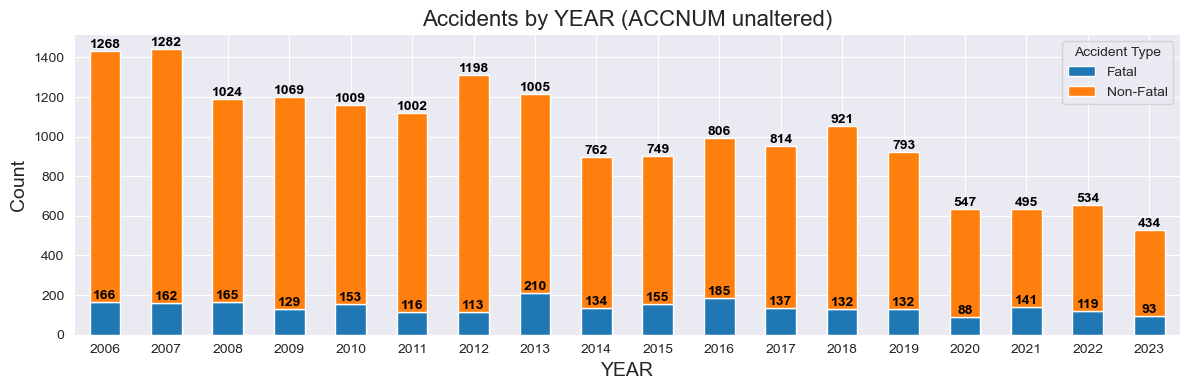

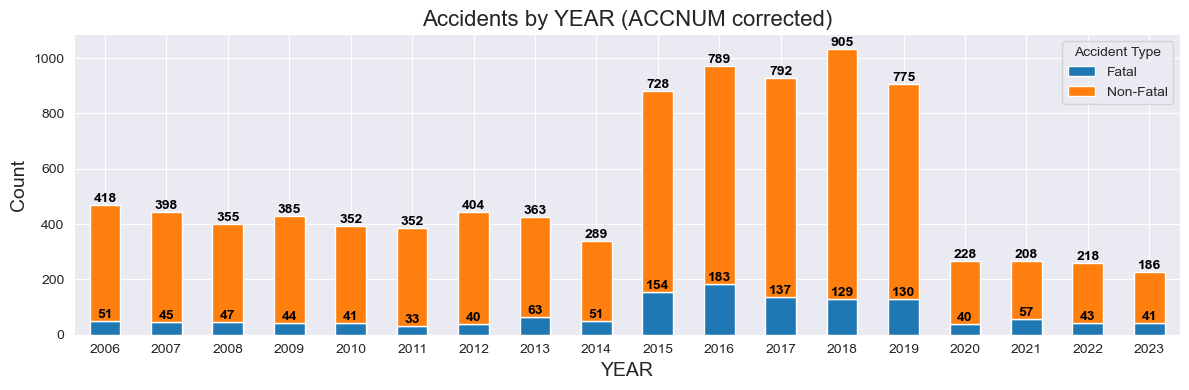

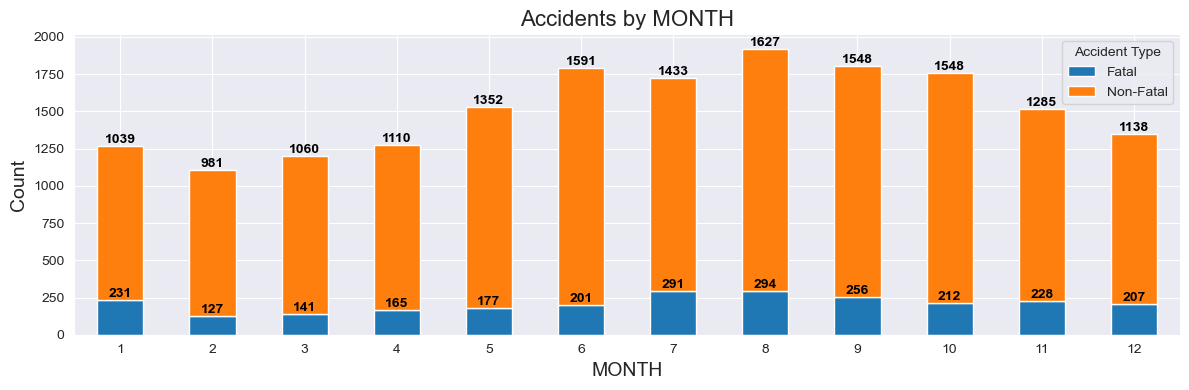

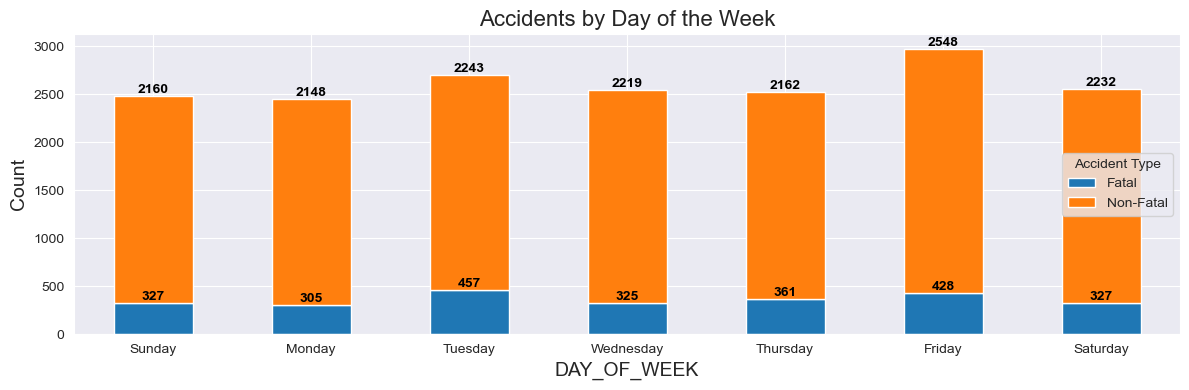

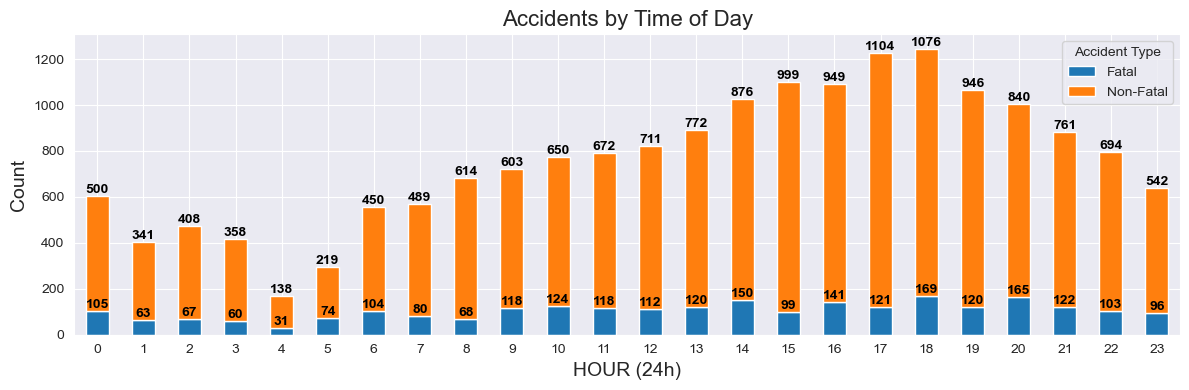

In [101]:
stacked_hist(df1, 'YEAR', 'Accidents by YEAR (ACCNUM unaltered)', 'YEAR', 'Count')
stacked_hist(df2, 'YEAR', 'Accidents by YEAR (ACCNUM corrected)', 'YEAR', 'Count')
stacked_hist(df1, 'MONTH', 'Accidents by MONTH', 'MONTH', 'Count')
stacked_hist(df1, 'DAY_OF_WEEK', 'Accidents by Day of the Week', 'DAY_OF_WEEK', 'Count')
stacked_hist(df1, 'HOUR', 'Accidents by Time of Day', 'HOUR (24h)', 'Count')

### Plot 7, 8, 9, 10: Accidents by vehicle type, location, and road & light conditions.

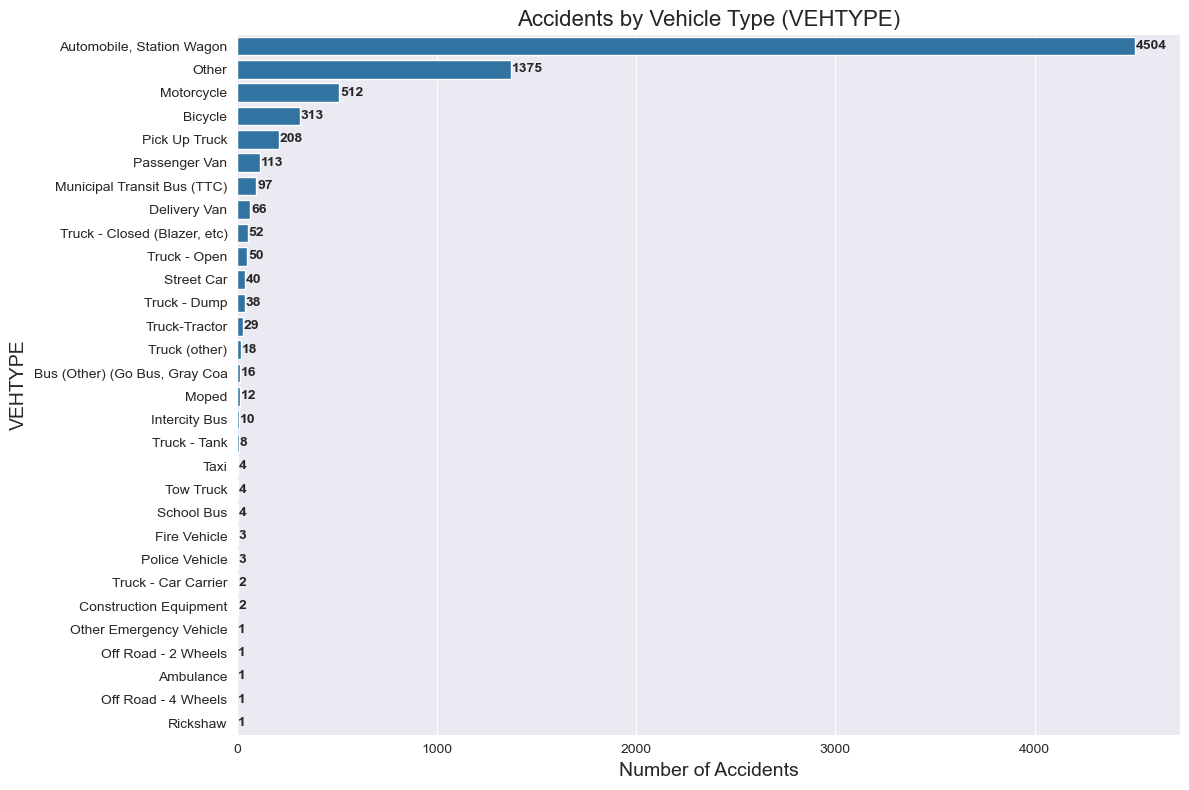

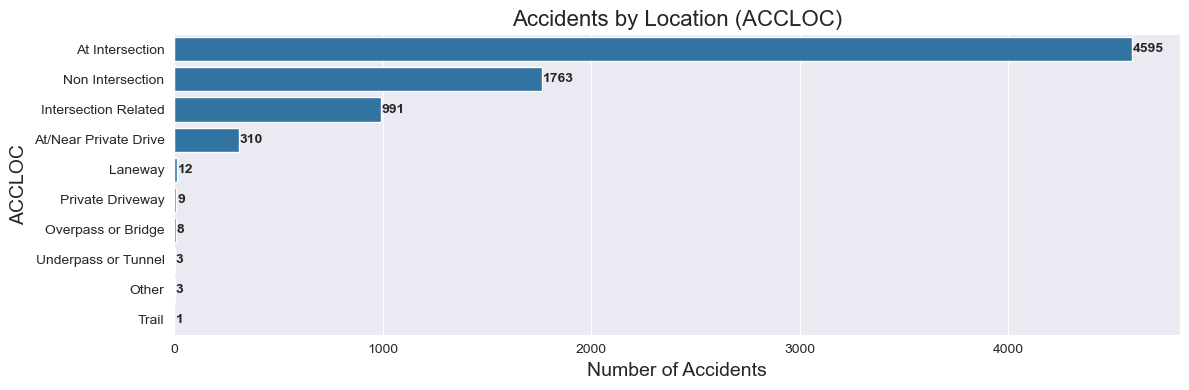

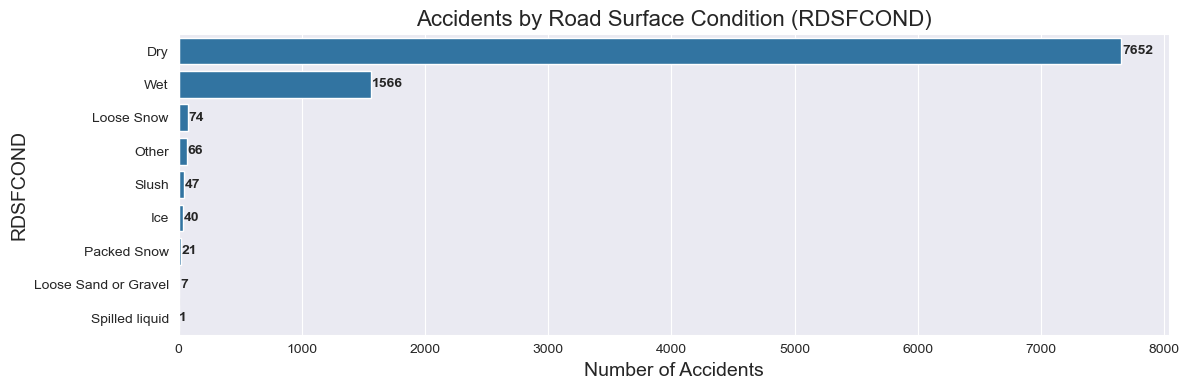

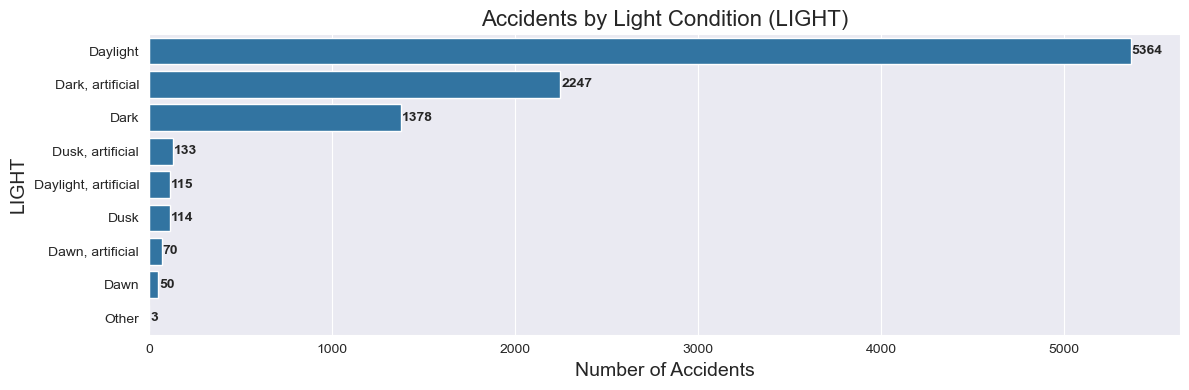

In [102]:
hbar(df2, 'VEHTYPE', 'Accidents by Vehicle Type (VEHTYPE)', 'Number of Accidents', 'VEHTYPE')
hbar(df2, 'ACCLOC', 'Accidents by Location (ACCLOC)', 'Number of Accidents', 'ACCLOC', figsize=(12, 4))
hbar(df2, 'RDSFCOND', 'Accidents by Road Surface Condition (RDSFCOND)', 'Number of Accidents', 'RDSFCOND', figsize=(12, 4))
hbar(df2, 'LIGHT', 'Accidents by Light Condition (LIGHT)', 'Number of Accidents', 'LIGHT', figsize=(12, 4))

### Plots 11-14: Involved population

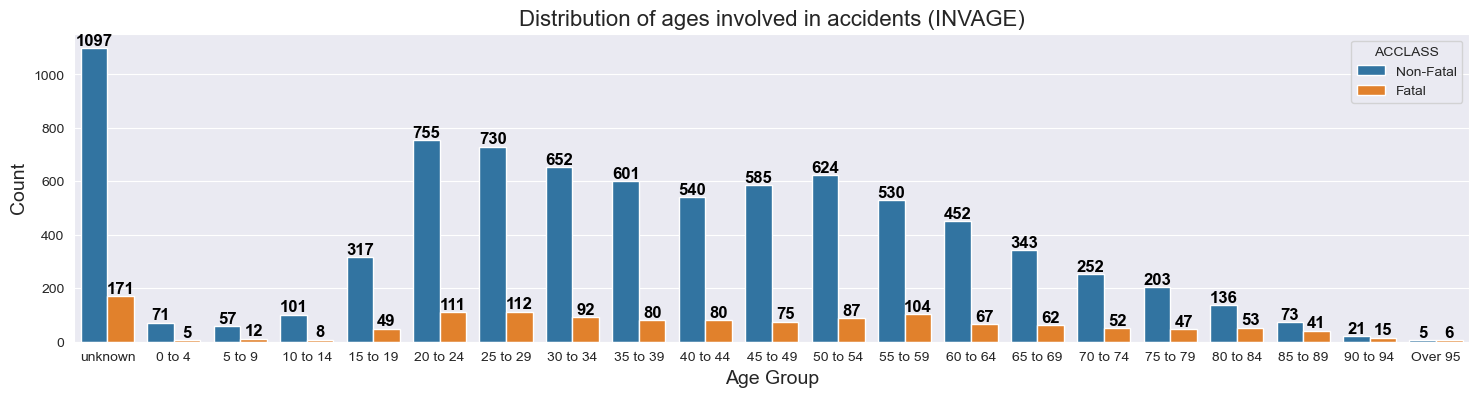

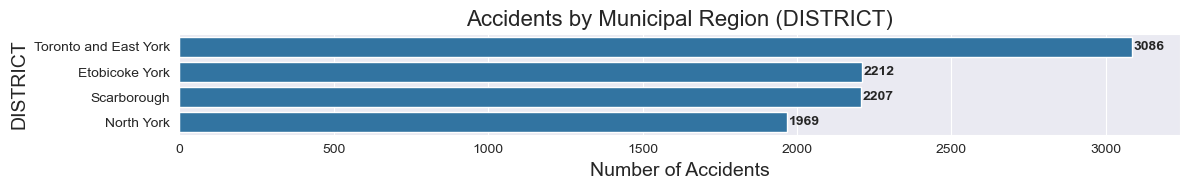

In [103]:
plot_age_distribution(df=df2, figsize=(18, 4))
hbar(df2, 'DISTRICT', 'Accidents by Municipal Region (DISTRICT)', 'Number of Accidents', 'DISTRICT', figsize=(12, 2))

Hotspot center: (-79.383167, 43.654246 )


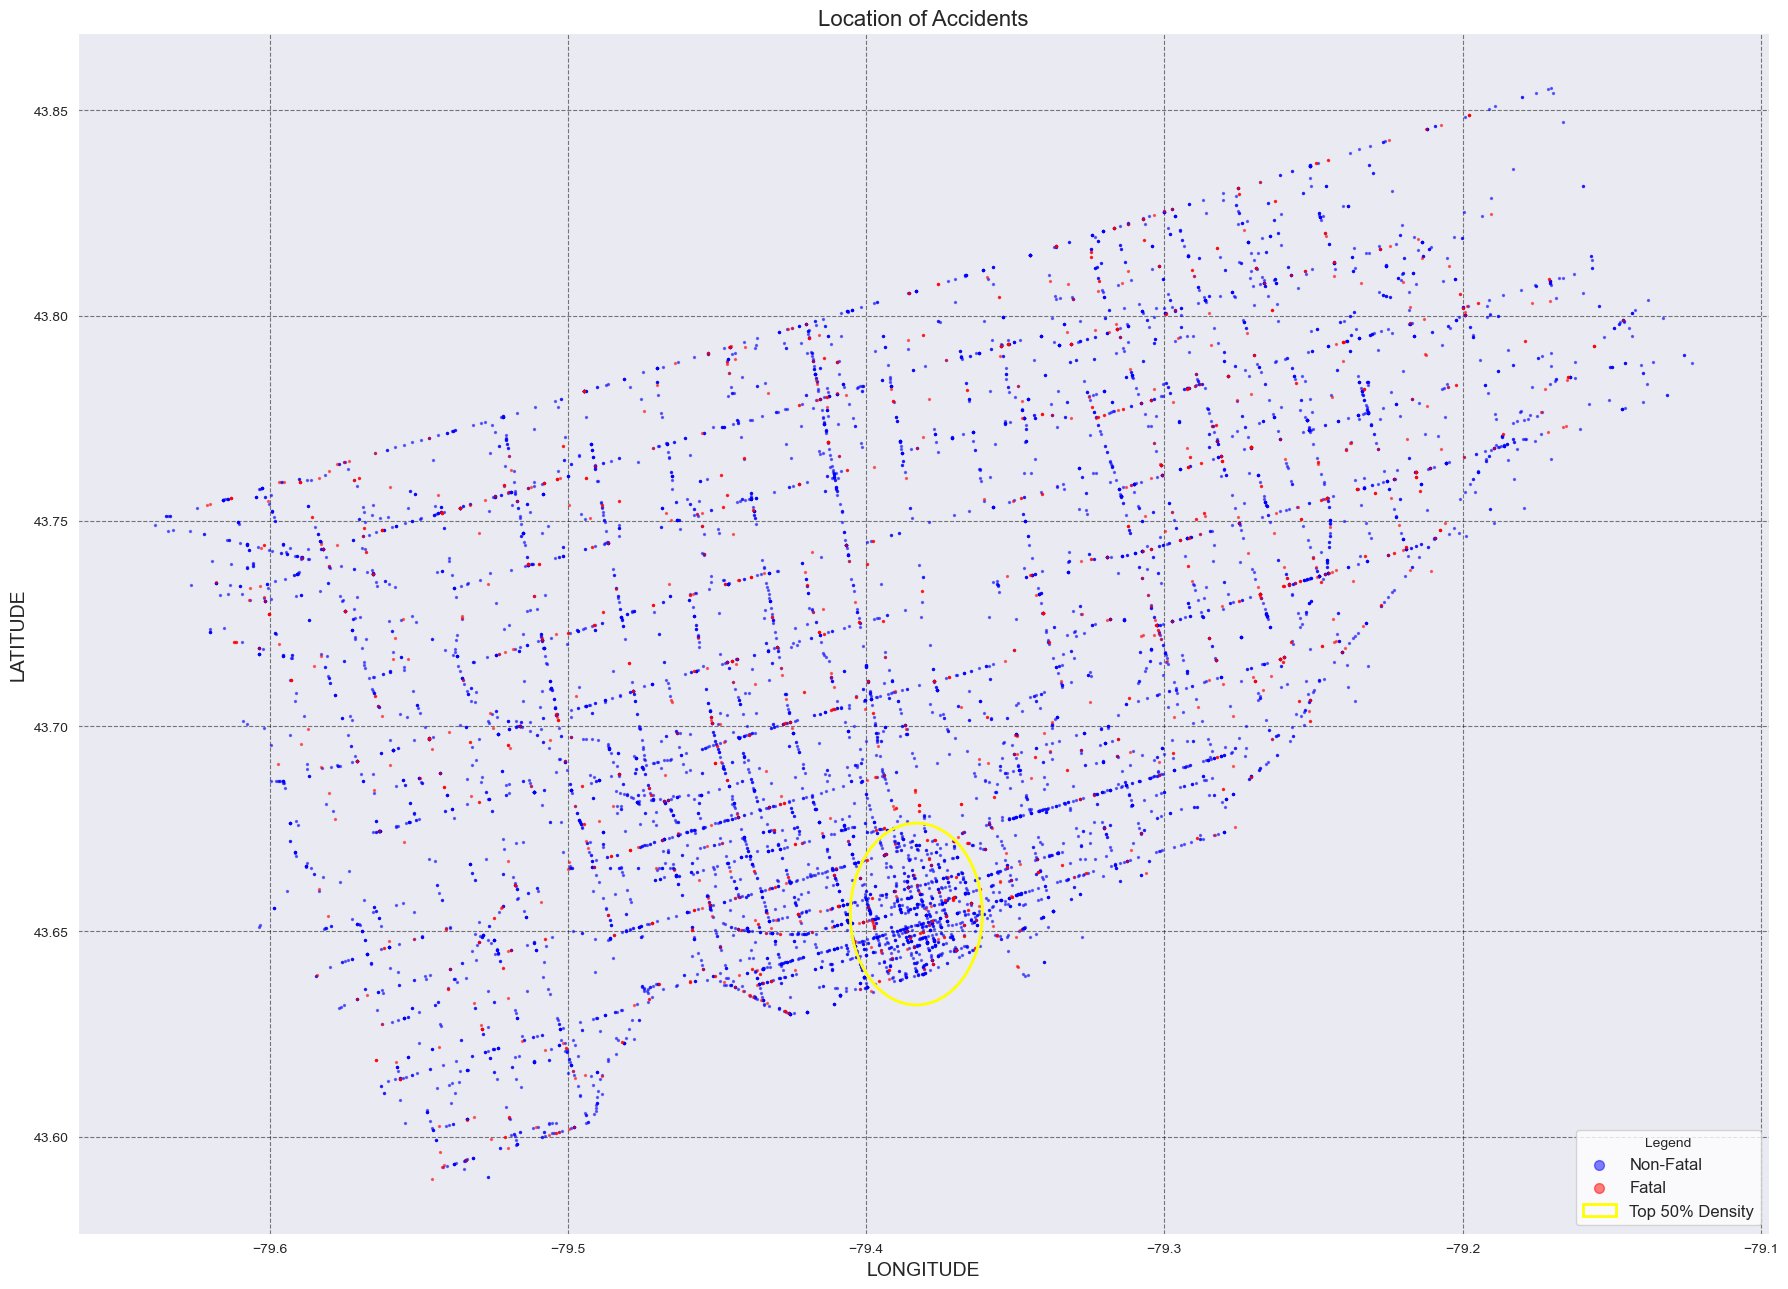

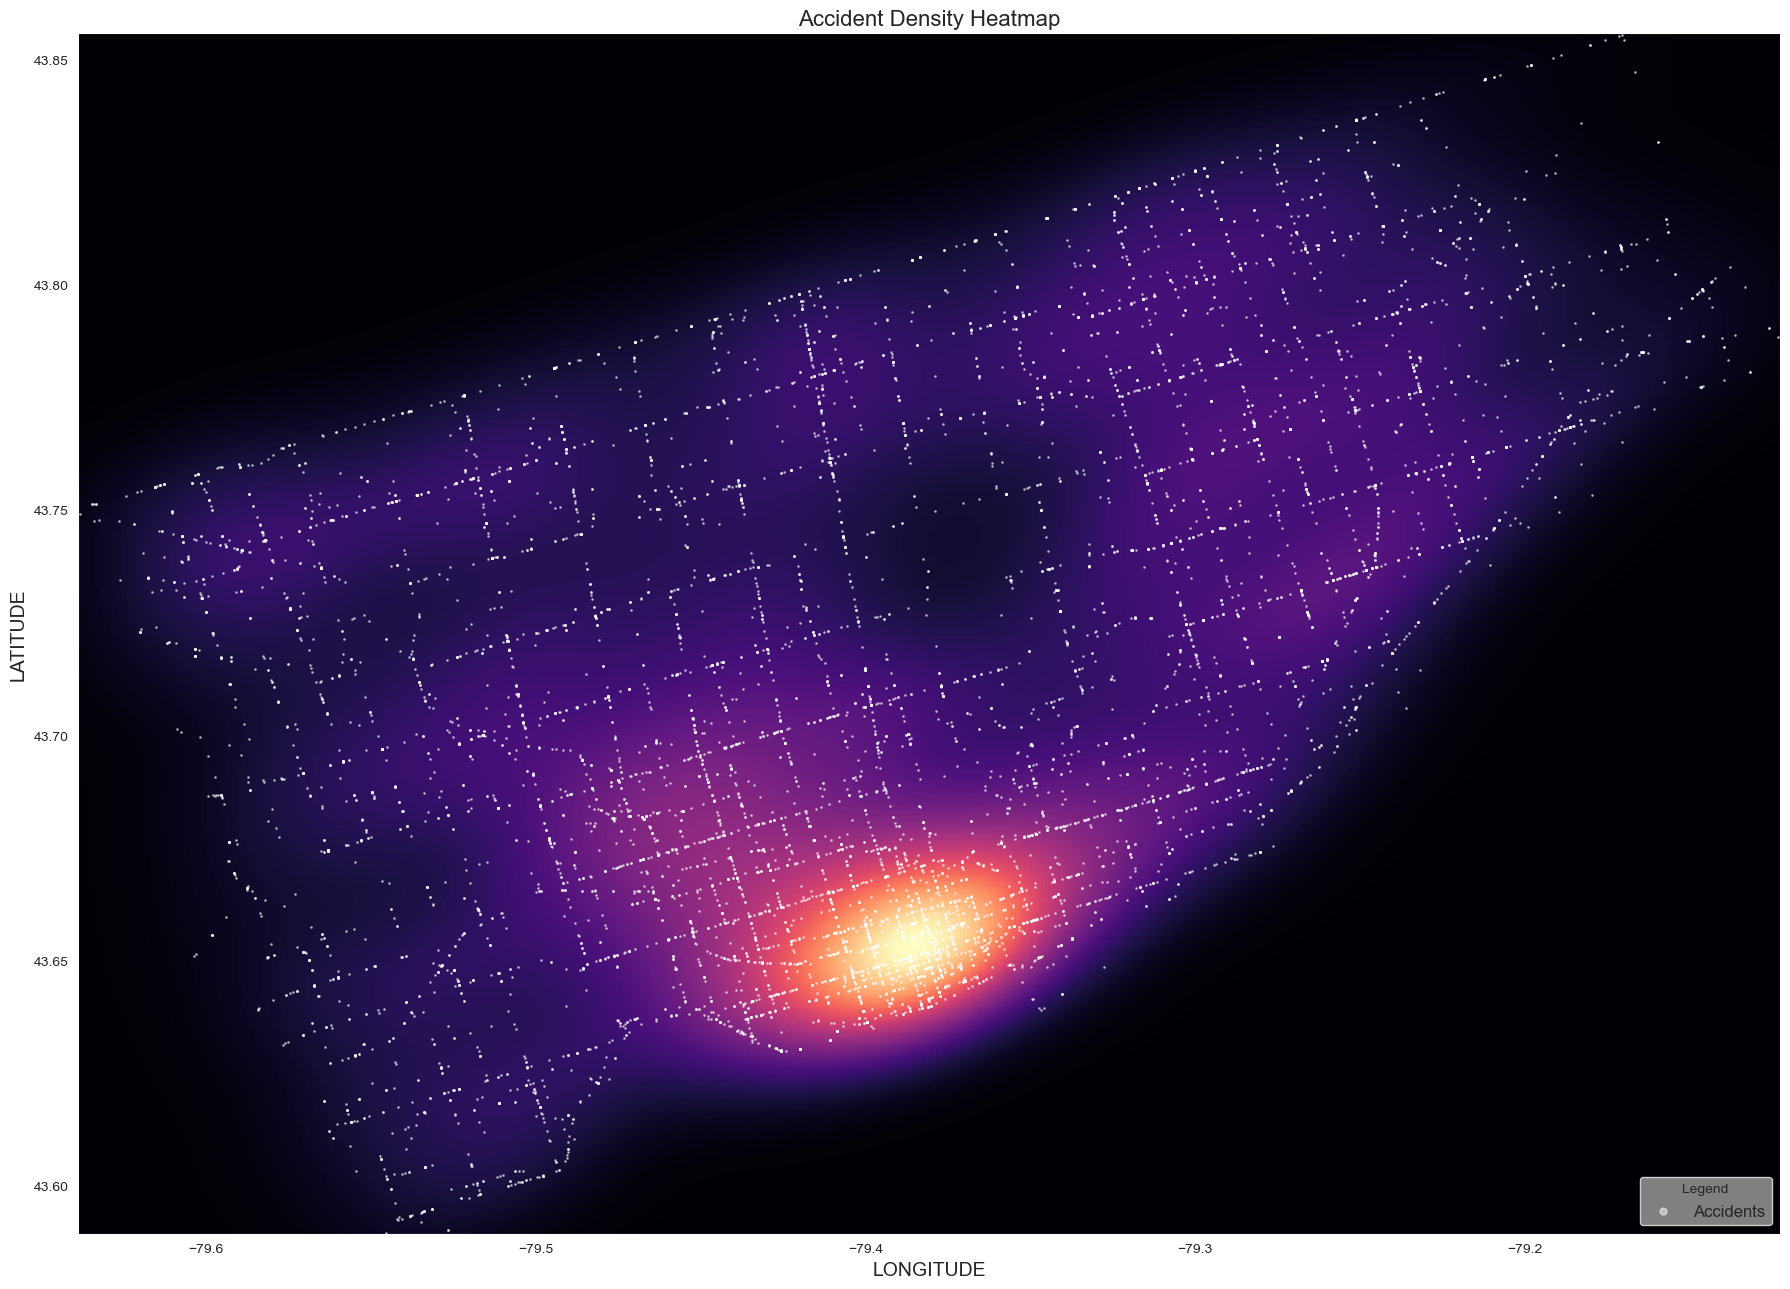

In [104]:
# This single command will output 2 maps.
map_accidents(df2, grid_resolution=500, density_threshold=0.5, dot_size=2, figsize=(18, 13))

### Insights:
- Dataset presents a heavy bias on 'non-fatal' accidents. That's good in the safety sense, but not as good for statistical analysis as there is fewer data points to analyze fatal accidents.
- The histogram for yearly accidents has a questionable discrepancy. When analyzing the dataset where ACCNUM duplicates were not yet removed, the total accidents on a yearly basis are shown to be steadily declining, that's good news. Yearly fatalities tend to also be on a very slow decline but is less predictable. Then, when duplicates are removed, all years  shrunk proportionally except for years 2015-2019 as their accident count barely shrunk. I'm not sure why this is.
- Most accidents happen during the summer months when people are on school break (JUN-AUG) and when the population is temporarily higher due to vacationers and tourists.
- Fridays are the most prevalent in total accidents; it's the weekend and more drivers leave and enter the city, also people tend to be crazier on the road (personal experience).
- Station wagons and 'other' vehicles account for more than half all the accidents.
- Dry weather allows for faster (more aggressive) driving, thus leads in accidents by road surface condition. While wet conditions inhibits braking power and are more slippery. Sometimes vehicles can experience hydroplaning.
- Ages 20-54 are the most involved in these accidents, while the age group 20-24 have the highest among all accounts. This is when many new drivers in Ontario receive their full G license, and are just starting to drive on their own with less supervision and driving restrictions. Number of accidents decrease as age increases, this is likely due to the elderly staying at home more and also driving less.
- Most accidents happen during daylight, just a bit more than in dark lighting conditions, probably due to higher
pedestrian activity during the day and many people would already be home after their 9am-5pm jobs.
- In terms of density, downtown Toronto seems to have the highest concentration of accidents. This is anticipated as it is the densest by residential and general pedestrian population out of all the other regions. The downtown area has never been very compatible with cars (historic roads dedicated to trams, cycling & pedestrian walking). It has become plagued with heavy congestion by personal vehicles and endless construction. Because of these, more pedestrians, cyclists and drivers are active at any time and much closer to each other, which could increase the chances of accidents.
- Superficially, the graphs don't seem to indicate which features would best correlate to fatal accidents. But they can provide some insight for the human when interpreting prediction results.